# <span style = "color : green"> Credit Card Customer Data </span>

***

A Customer Credit Card Information Dataset which can be used for Identifying Loyal Customers, Customer Segmentation, Targeted Marketing and other such use cases in the Marketing Industry.

## <span style = "color : blue"> Content </span>

The Attributes Include:

* Sl_No
* Customer Key
* AvgCreditLimit
* TotalCreditCards
* Totalvisitsbank
* Totalvisitsonline
* Totalcallsmade

## Let's Begin

### Import necessary libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Read 'Credit Card Customer Data.csv' and store it in a DataFrame variable

In [5]:
df=pd.read_csv('Credit Card Customer Data.csv')

### View top 5 rows

In [6]:
df.head()

,Sl_No,Customer Key,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
0,1,87073,100000,2,1,1,0
1,2,38414,50000,3,0,10,9
2,3,17341,50000,7,1,3,4
3,4,40496,30000,5,1,1,4
4,5,47437,100000,6,0,12,3


### View info

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 660 entries, 0 to 659
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype
---  ------               --------------  -----
 0   Sl_No                660 non-null    int64
 1   Customer Key         660 non-null    int64
 2   Avg_Credit_Limit     660 non-null    int64
 3   Total_Credit_Cards   660 non-null    int64
 4   Total_visits_bank    660 non-null    int64
 5   Total_visits_online  660 non-null    int64
 6   Total_calls_made     660 non-null    int64
dtypes: int64(7)
memory usage: 36.2 KB


### View statistical information about the dataset

In [8]:
df.describe()

,Sl_No,Customer Key,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
count,660.000000,660.000000,660.000000,660.000000,660.000000,660.000000,660.000000
mean,330.500000,55141.443939,34574.242424,4.706061,2.403030,2.606061,3.583333
std,190.669872,25627.772200,37625.487804,2.167835,1.631813,2.935724,2.865317
min,1.000000,11265.000000,3000.000000,1.000000,0.000000,0.000000,0.000000
25%,165.750000,33825.250000,10000.000000,3.000000,1.000000,1.000000,1.000000
50%,330.500000,53874.500000,18000.000000,5.000000,2.000000,2.000000,3.000000
75%,495.250000,77202.500000,48000.000000,6.000000,4.000000,4.000000,5.000000
max,660.000000,99843.000000,200000.000000,10.000000,5.000000,15.000000,10.000000


### Check for any null values

In [9]:
df.isna().sum()

Sl_No                  0
Customer Key           0
Avg_Credit_Limit       0
Total_Credit_Cards     0
Total_visits_bank      0
Total_visits_online    0
Total_calls_made       0
dtype: int64

### Check the shape of the dataset

In [10]:
df.shape

(660, 7)

### Drop irrelevent columns (SI_No and Customer Key)

In [12]:
df.columns

Index(['Sl_No', 'Customer Key', 'Avg_Credit_Limit', 'Total_Credit_Cards',
       'Total_visits_bank', 'Total_visits_online', 'Total_calls_made'],
      dtype='object')

In [14]:
df.drop(columns=['Sl_No', 'Customer Key'],inplace=True)

## <span style = "color:orange"> Visualization </span>

### Plot a scatterplot of Avg_credit_Limit vs Total_Credit_Cards with respect to Total_calls_made

In [15]:
df.columns

Index(['Avg_Credit_Limit', 'Total_Credit_Cards', 'Total_visits_bank',
       'Total_visits_online', 'Total_calls_made'],
      dtype='object')

<AxesSubplot:xlabel='Avg_Credit_Limit', ylabel='Total_Credit_Cards'>

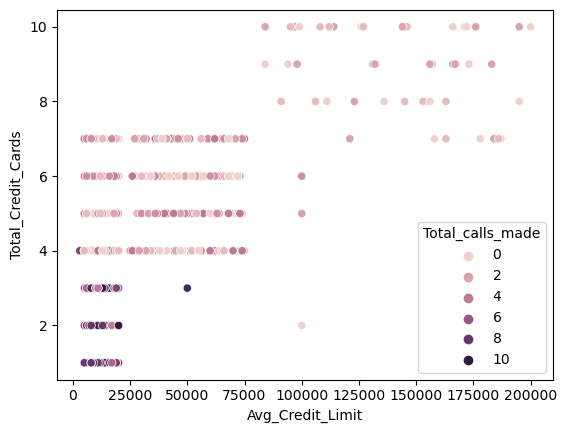

In [17]:
sns.scatterplot(data=df,x='Avg_Credit_Limit',y='Total_Credit_Cards',hue='Total_calls_made')

### Plot correlation matix on Heatmap

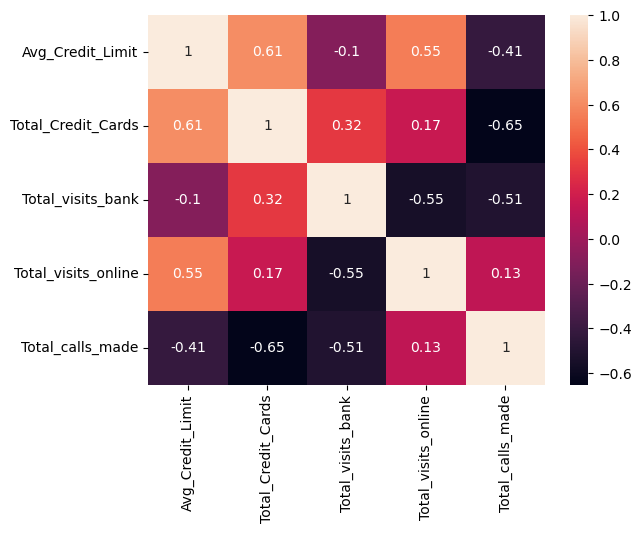

In [19]:
sns.heatmap(data=df.corr(),annot=True)
plt.show()

### Plot a pairplot

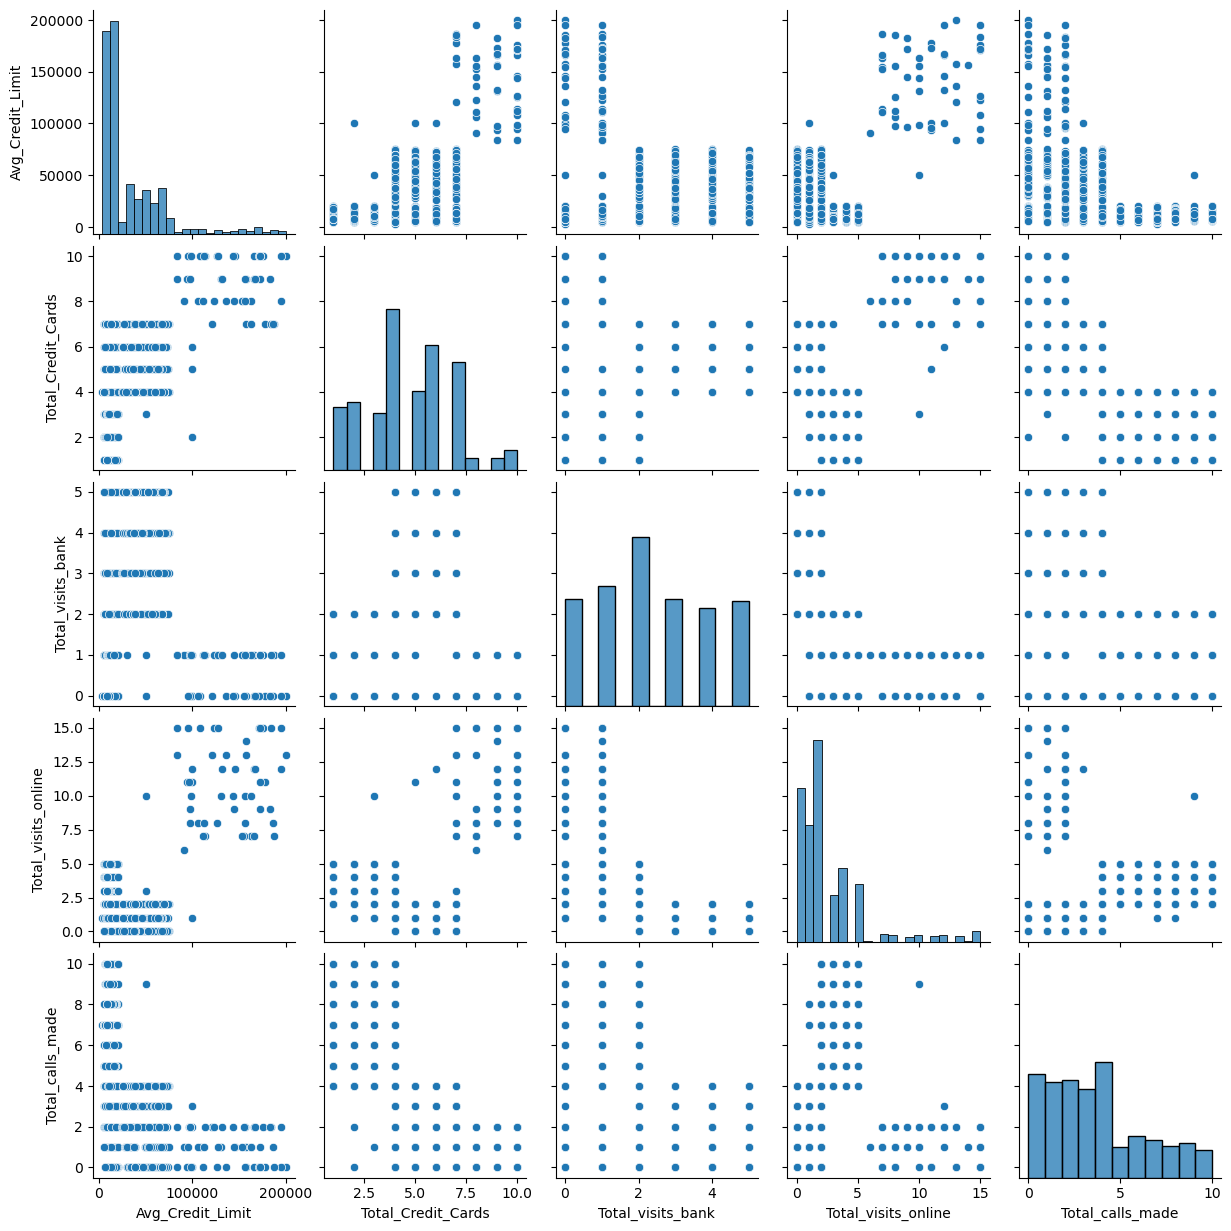

In [20]:
sns.pairplot(data=df)
plt.show()

### Create K Means model (Let k = 4)

In [21]:
from sklearn.cluster import KMeans

In [22]:
model=KMeans(n_clusters=4)

### Fit predict for our Dataset

In [24]:
clusters=model.fit_predict(df)

### Assign the predicted clusters to a new column in our dataset

In [28]:
df['Clusters'] = clusters

In [40]:
df['Clusters'].unique()

array([2, 3, 0, 1])

In [41]:
df0=df[df['Clusters']==0]
df2=df[df['Clusters']==2]
df3=df[df['Clusters']==3]
df1=df[df['Clusters']==1]

In [29]:
df.head()

,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made,Clusters
0,100000,2,1,1,0,2
1,50000,3,0,10,9,3
2,50000,7,1,3,4,3
3,30000,5,1,1,4,3
4,100000,6,0,12,3,2


## Visualize the clusters

In [48]:
# Use x = 'Avg_Credit_Limit' ang y =  'Total_Credit_Cards'

In [32]:
df.columns

Index(['Avg_Credit_Limit', 'Total_Credit_Cards', 'Total_visits_bank',
       'Total_visits_online', 'Total_calls_made', 'Clusters'],
      dtype='object')

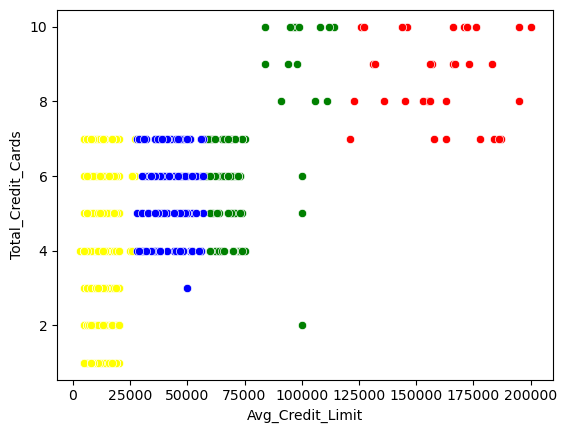

In [51]:
sns.scatterplot(data=df0,x='Avg_Credit_Limit',y='Total_Credit_Cards',color='yellow')
sns.scatterplot(data=df2,x='Avg_Credit_Limit',y='Total_Credit_Cards',color='green')
sns.scatterplot(data=df1,x='Avg_Credit_Limit',y='Total_Credit_Cards',color='red')
sns.scatterplot(data=df3,x='Avg_Credit_Limit',y='Total_Credit_Cards',color='blue')
plt.show()

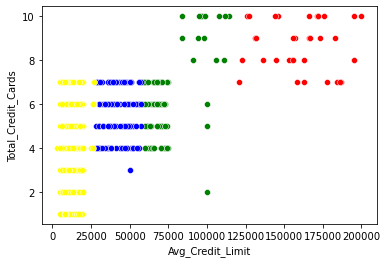

***

# <span style = "color : green;font-size:40px"> Great Job! </span>